<a href="https://colab.research.google.com/github/aishwarya-singh25/llm-data-viz/blob/main/misc/trial1_lidaSupermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Note - run a GPU instance on Colab

# 1. Initialize Lida

In [1]:
# install libs
!pip install -q lida[transformers]
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.5/178.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [3]:
# import libs
from lida import Manager, TextGenerationConfig, llm

In [4]:
# insert credentials
from google.colab import userdata
openai_api_key = userdata.get("openaiKey")

# download kaggle api key and upload on Colab
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# 2. Visualizations

## 2.1 Simple viz

In [5]:
# initialize lida config for openAI
lida = Manager(text_gen = llm("openai", api_key=openai_api_key))
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo", use_cache=True)

In [6]:
# import dataset
!kaggle datasets download -d iamsouravbanerjee/customer-shopping-trends-dataset
!unzip customer-shopping-trends-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset
License(s): other
  0% 0.00/146k [00:00<?, ?B/s]
100% 146k/146k [00:00<00:00, 46.6MB/s]
Archive:  customer-shopping-trends-dataset.zip
  inflating: shopping_trends.csv     
  inflating: shopping_trends_updated.csv  


In [7]:
# summarize data
summary = lida.summarize("shopping_trends.csv", summary_method="default", textgen_config=textgen_config)
summary.keys()

dict_keys(['name', 'file_name', 'dataset_description', 'fields', 'field_names'])

In [8]:
# define goals
goals = lida.goals(
    summary,
    n=1,
    textgen_config=textgen_config
)

In [9]:
# display goals
goals[0]


### Goal 0
---
**Question:** What is the distribution of Purchase Amount (USD) among different Item Purchased categories?

**Visualization:** `bar chart showing Purchase Amount (USD) by Item Purchased`

**Rationale:** By visualizing the Purchase Amount (USD) by different Item Purchased categories, we can identify which items are generating higher revenue and understand the purchasing patterns of customers, providing insights for targeted marketing strategies.


<string>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<string>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



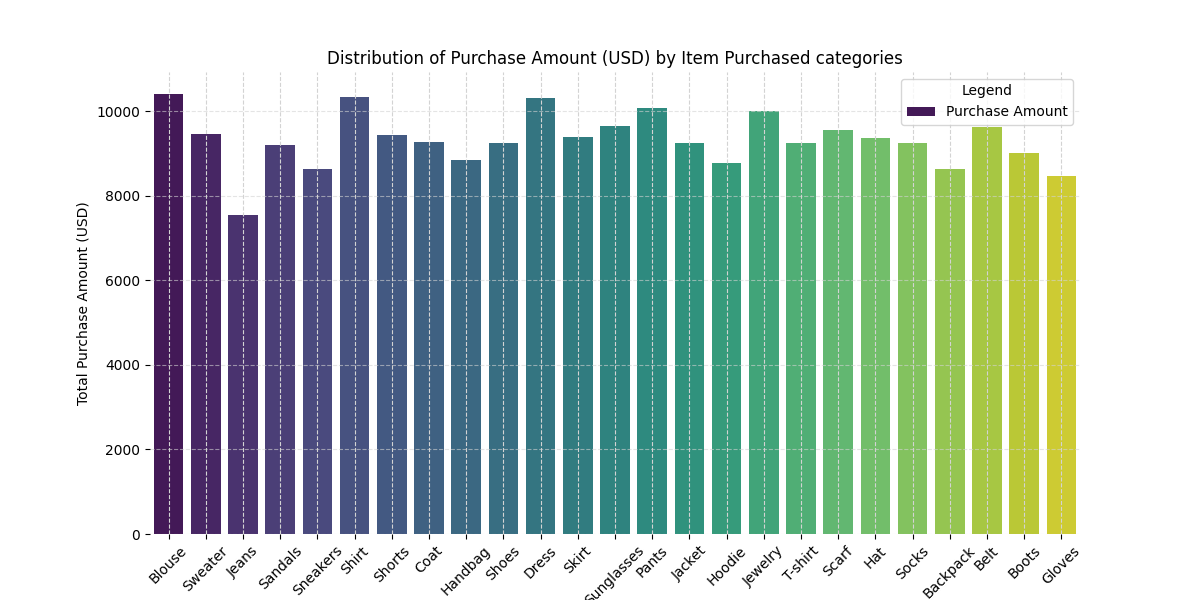

In [10]:
# create chart for the goal
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[0], textgen_config=textgen_config, library=library)
charts[0]

# 3. Streamlit Implementation

In [11]:
%%writefile app.py

import base64
import numpy as np
import streamlit as st
from lida import Manager, TextGenerationConfig, llm

openai_api_key = 'sk-'
st.title("Simple viz")

prompt = st.chat_input(
    "Ask your query for the shopping trends dataset"
)

if not prompt: st.stop()

with st.chat_message("question"):
    st.markdown(prompt, unsafe_allow_html=True)

with st.spinner("Thinking..."):
    library = "seaborn"
    lida = Manager(text_gen = llm("openai", api_key=openai_api_key))
    textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo", use_cache=True)
    summary = lida.summarize("shopping_trends.csv", summary_method="default", textgen_config=textgen_config)
    charts = lida.visualize(summary=summary, goal=prompt, textgen_config=textgen_config, library=library)

    # if generation fails, retry five times
    cnt = 5
    while (len(charts) < 1) and (cnt > 0):
        textgen_config = TextGenerationConfig(n=1, temperature=0.2, model="gpt-3.5-turbo", use_cache=False)
        charts = lida.visualize(summary=summary, goal=prompt, textgen_config=textgen_config, library=library)
        cnt -= 1

    # if still fails
    with st.chat_message("response"):
        st.write("You need more money, buy GPT5")

    with st.chat_message("response"):
        st.image(base64.b64decode(charts[0].raster))

Writing app.py


In [12]:
# install reverse proxy
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.755s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [13]:
# host streamlit app
!streamlit run app.py &>/content/logs.txt &

In [14]:
# show password
import urllib
print("Copy the password and paste it in the website link below:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Copy the password and paste it in the website link below: 35.233.247.181


In [16]:
#NOTE sometimes it takes time to show the streamlit app
#NOTE works for goal[0] question, PFB
# What is the distribution of Purchase Amount (USD) among different Item Purchased categories?
!npx localtunnel --port 8501

npx: installed 22 in 1.425s
your url is: https://thin-rocks-feel.loca.lt
^C
